This notebook visualizes potential relationships between columns in baseball data. For example, we explored the relationship between Batting, Pitching, HallOfFame, AwardsSharePlayers, and salary. The relationship between fielding and salary proved to be the strongest. 

In [48]:
import pandas as pd

# a code to import PANDAS, or python data analysis library into Google Colaboratory 

import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload() 

Saving Salaries.csv to Salaries.csv


In [3]:
uploaded = files.upload() 

Saving Batting.csv to Batting.csv


In [4]:
uploaded = files.upload() 

Saving Pitching.csv to Pitching.csv


In [5]:
uploaded = files.upload() 

Saving HallOfFame.csv to HallOfFame.csv


In [6]:
uploaded = files.upload()

Saving AwardsSharePlayers.csv to AwardsSharePlayers.csv


In [7]:
csv_salaries = pd.read_csv("Salaries.csv")
csv_salaries.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [12]:
dfbat = pd.read_csv("Batting.csv")
dfbat.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118.0,30.0,32.0,6.0,...,13.0,8.0,1.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137.0,28.0,40.0,4.0,...,19.0,3.0,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133.0,28.0,44.0,10.0,...,27.0,1.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120.0,29.0,39.0,11.0,...,16.0,6.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN


In [13]:
merged_data_btsl = dfbat.merge(csv_salaries,on=["playerID", "yearID"])
merged_data_btsl.head()

,playerID,yearID,stint,teamID_x,lgID_x,G,AB,R,H,2B,...,BB,SO,IBB,HBP,SH,SF,GIDP,teamID_y,lgID_y,salary
0,ackerji01,1985,1,TOR,AL,61,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TOR,AL,170000
1,agostju01,1985,1,CHA,AL,54,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CHA,AL,147500
2,aguaylu01,1985,1,PHI,NL,91,165.0,27.0,46.0,7.0,...,22.0,26.0,5.0,6.0,4.0,3.0,7.0,PHI,NL,237000
3,alexado01,1985,1,TOR,AL,36,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TOR,AL,875000
4,allenne01,1985,1,SLN,NL,23,2.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,SLN,NL,750000


In [14]:
dfmerg_btsl = merged_data_btsl.query('yearID == 2007 and RBI > 79')

In [15]:
dfmerg_btsl_2 = merged_data_btsl

In [16]:
dfmerg3 = merged_data_btsl.query('RBI > 79')

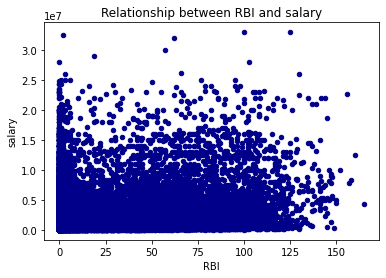

In [17]:
dfmerg_btsl_2.plot.scatter(x='RBI', y='salary', c='DarkBlue')
plt.title('Relationship between RBI and salary')
plt.show()

# Players may be famous for fielding than hitting, players may be famous 
# for pitching than hitting
# Players' salaries are based on players' performance in the last season
# (also why players with high RBI have low salary)
# Inflation is the years past may be another factor that can make this data 
# inaccurate in historical context 
# The scatterplot was far from the expected result because the plot shows 
# low RBI players with high salary 
# Low RBI players with high salary qualifying for other baseball skills 
# explain the trend

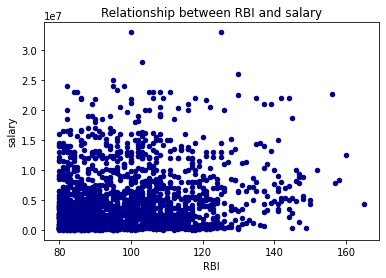

In [18]:
dfmerg3.plot.scatter(x='RBI', y='salary', c='DarkBlue')
plt.title('Relationship between RBI and salary')
plt.show()

# approach: cut/filter players with almost 0 RBI because they 
# should be good at something else
# use previous RBI table (25%) to get top 75% players  

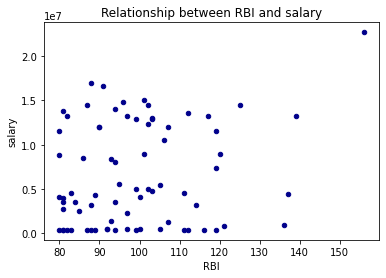

In [19]:
dfmerg_btsl.plot.scatter(x='RBI', y='salary', c='DarkBlue')
plt.title('Relationship between RBI and salary')
plt.show()

# This scatterplot is even closer to the data desired than the previous 
# scatterplot because there seems to be an exponential growth in the 
# relationship between RBI and salary 
# The relationship between the two datasets exist, but is subtle
# There may be other factors that more significantly influence a player's salary  

In [20]:
csv_sal = pd.read_csv("Salaries.csv")
csv_sal.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [21]:
csv_pitch = pd.read_csv("Pitching.csv")
csv_pitch.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,...,NaN,NaN,NaN,0,NaN,NaN,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,...,NaN,NaN,NaN,0,NaN,NaN,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,...,NaN,NaN,NaN,0,NaN,NaN,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,...,NaN,NaN,NaN,0,NaN,NaN,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,...,NaN,NaN,NaN,0,NaN,NaN,21,NaN,NaN,NaN


In [22]:
merged_data_pitch = csv_sal.merge(csv_pitch,on=["playerID", "yearID"])
merged_data_pitch.head()

,yearID,teamID_x,lgID_x,playerID,salary,stint,teamID_y,lgID_y,W,L,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,1985,ATL,NL,barkele01,870000,1,ATL,NL,2,9,...,1.0,3.0,1.0,0,335.0,1.0,55,NaN,NaN,NaN
1,1985,ATL,NL,bedrost01,550000,1,ATL,NL,7,15,...,6.0,6.0,5.0,0,907.0,0.0,101,NaN,NaN,NaN
2,1985,ATL,NL,campri01,633333,1,ATL,NL,4,6,...,11.0,4.0,5.0,0,569.0,23.0,72,NaN,NaN,NaN
3,1985,ATL,NL,dedmoje01,150000,1,ATL,NL,6,3,...,14.0,2.0,1.0,1,377.0,15.0,52,NaN,NaN,NaN
4,1985,ATL,NL,forstte01,483333,1,ATL,NL,2,3,...,4.0,1.0,0.0,0,253.0,19.0,22,NaN,NaN,NaN


In [23]:
dfmerg_pitch = merged_data_pitch.query('yearID == 2007 and ERA < 2.44')

In [24]:
dfmerg_pitch_2 = merged_data_pitch.query('yearID == 2007 and ERA < 6.91')

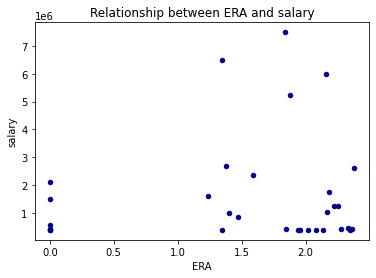

In [25]:
dfmerg_pitch.plot.scatter(x='ERA', y='salary', c='DarkBlue')
plt.title('Relationship between ERA and salary')
plt.show()

# This merged graph shows the relationship between pitchers' ERA and salary. 
# Not really close to the desired data probably because ERA fluctuates a 
# lot every year for players, so the data that year may not be the accurate 
# reflection of their performance 

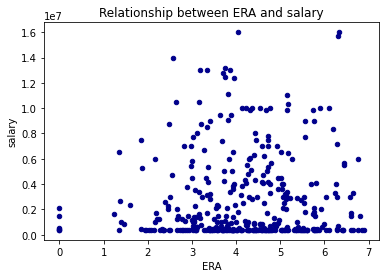

In [26]:
dfmerg_pitch_2.plot.scatter(x='ERA', y='salary', c='DarkBlue')
plt.title('Relationship between ERA and salary')
plt.show()

# This scatterplot shows the relationship between ERA and salary 
# to be a slightly positive correlation 
# The result is far from the expected result because a low ERA is a 
# good pitching data, but it seems that the salary is lower for good ERA pitchers 
# The likely reason for this correlation is because ERA fluctuates a lot over a 
#single season by small mistakes, so ERA below 2 or 3 is considered all good 

In [27]:
csv_HOF = pd.read_csv("HallOfFame.csv")
csv_HOF.head()

,playerID,yearid,votedBy,ballots,needed,votes,inducted,category,needed_note
0,cobbty01,1936,BBWAA,226.0,170.0,222.0,Y,Player,NaN
1,ruthba01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN
2,wagneho01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN
3,mathech01,1936,BBWAA,226.0,170.0,205.0,Y,Player,NaN
4,johnswa01,1936,BBWAA,226.0,170.0,189.0,Y,Player,NaN


In [28]:
merged_data_ballot = csv_sal.merge(csv_HOF, right_on=["playerID", "yearid"], left_on=["playerID", "yearID"])
merged_data_ballot

,yearID,teamID,lgID,playerID,salary,yearid,votedBy,ballots,needed,votes,inducted,category,needed_note
0,2013,ATL,NL,francju02,496250,2013,BBWAA,569.0,427.0,6.0,N,Player,NaN


In [29]:
csv_HOF.describe() 

,yearid,ballots,needed,votes
count,4120.000000,3927.000000,3770.000000,3927.000000
mean,1968.889563,320.705373,243.989920,50.995926
std,22.899162,125.495156,94.557016,84.845195
min,1936.000000,78.000000,59.000000,0.000000
25%,1950.000000,226.000000,175.000000,2.000000
50%,1964.000000,274.000000,213.000000,10.000000
75%,1987.000000,425.000000,321.000000,64.000000
max,2016.000000,581.000000,436.000000,555.000000


In [30]:
csv_share = pd.read_csv("AwardsSharePlayers.csv")
csv_share.head()

,awardID,yearID,lgID,playerID,pointsWon,pointsMax,votesFirst
0,Cy Young,1956,ML,fordwh01,1.0,16,1.0
1,Cy Young,1956,ML,maglisa01,4.0,16,4.0
2,Cy Young,1956,ML,newcodo01,10.0,16,10.0
3,Cy Young,1956,ML,spahnwa01,1.0,16,1.0
4,Cy Young,1957,ML,donovdi01,1.0,16,1.0


In [31]:
merged_data_awards = csv_sal.merge(csv_share, on=["yearID", "playerID"])
merged_data_awards

,yearID,teamID,lgID_x,playerID,salary,awardID,lgID_y,pointsWon,pointsMax,votesFirst
0,1985,ATL,NL,murphda05,1625000,MVP,NL,63.0,336,0.0
1,1985,BAL,AL,murraed02,1472819,MVP,AL,130.0,392,0.0
2,1985,BAL,AL,ripkeca01,800000,MVP,AL,9.0,392,0.0
3,1985,BOS,AL,boggswa01,1000000,MVP,AL,159.0,392,0.0
4,1985,BOS,AL,gedmari01,477500,MVP,AL,1.0,392,0.0
...,...,...,...,...,...,...,...,...,...,...
2369,2015,TOR,AL,encared01,10000000,MVP,AL,38.0,420,0.0
2370,2015,TOR,AL,estrama01,3900000,Cy Young,AL,3.0,210,0.0
2371,2015,TOR,AL,martiru01,7000000,MVP,AL,2.0,420,0.0
2372,2015,WAS,NL,harpebr03,2500000,MVP,NL,420.0,420,30.0


In [32]:
dfmerg_awards_share = merged_data_awards.query('yearID == 2007 and pointsWon > 30')

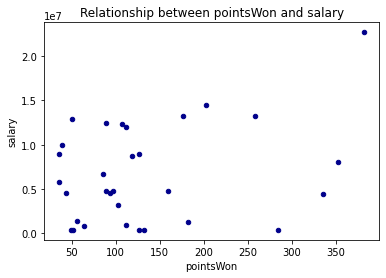

In [33]:
dfmerg_awards_share.plot.scatter(x='pointsWon', y='salary', c='DarkBlue')
plt.title('Relationship between pointsWon and salary')
plt.show()

# This scatterplot is closer to expected result prior because the pointsWon and 
# salary seems to have somewhat of a positive correlation 
# This poses a possible relationship between popularity and salary in baseball 

In [34]:
from google.colab import files
uploaded = files.upload()

Saving Fielding.csv to Fielding.csv


In [36]:
csv_fld = pd.read_csv("Fielding.csv")
csv_fld.head()

,playerID,yearID,stint,teamID,lgID,POS,G,GS,InnOuts,PO,A,E,DP,PB,WP,SB,CS,ZR
0,abercda01,1871,1,TRO,NaN,SS,1,NaN,NaN,1.0,3.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,2B,22,NaN,NaN,67.0,72.0,42.0,5.0,NaN,NaN,NaN,NaN,NaN
2,addybo01,1871,1,RC1,NaN,SS,3,NaN,NaN,8.0,14.0,7.0,0.0,NaN,NaN,NaN,NaN,NaN
3,allisar01,1871,1,CL1,NaN,2B,2,NaN,NaN,1.0,4.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,allisar01,1871,1,CL1,NaN,OF,29,NaN,NaN,51.0,3.0,7.0,1.0,NaN,NaN,NaN,NaN,NaN


In [37]:
merged_data_fld = csv_sal.merge(csv_fld, on=["playerID", "yearID"])
merged_data_fld

,yearID,teamID_x,lgID_x,playerID,salary,stint,teamID_y,lgID_y,POS,G,...,InnOuts,PO,A,E,DP,PB,WP,SB,CS,ZR
0,1985,ATL,NL,barkele01,870000,1,ATL,NL,P,20,...,221.0,2.0,9.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN
1,1985,ATL,NL,bedrost01,550000,1,ATL,NL,P,37,...,620.0,13.0,23.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN
2,1985,ATL,NL,benedbr01,545000,1,ATL,NL,C,70,...,1698.0,314.0,35.0,4.0,1.0,1.0,9.0,65.0,24.0,1.0
3,1985,ATL,NL,campri01,633333,1,ATL,NL,P,66,...,383.0,7.0,13.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN
4,1985,ATL,NL,ceronri01,625000,1,ATL,NL,C,91,...,2097.0,384.0,48.0,6.0,4.0,6.0,20.0,69.0,29.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51938,2015,WAS,NL,werthja01,21000000,1,WAS,NL,OF,86,...,NaN,113.0,3.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN
51939,2015,WAS,NL,zimmejo02,16500000,1,WAS,NL,P,33,...,NaN,16.0,29.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN
51940,2015,WAS,NL,zimmery01,14000000,1,WAS,NL,1B,93,...,NaN,726.0,49.0,4.0,63.0,NaN,NaN,NaN,NaN,NaN
51941,2015,WAS,NL,zimmery01,14000000,1,WAS,NL,LF,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
merged_data_fld["E2"] = pd.cut(merged_data_fld.E, bins=5, 
       labels=[5, 4, 3, 2, 1])

In [39]:
merged_data_fld.head()

,yearID,teamID_x,lgID_x,playerID,salary,stint,teamID_y,lgID_y,POS,G,...,PO,A,E,DP,PB,WP,SB,CS,ZR,E2
0,1985,ATL,NL,barkele01,870000,1,ATL,NL,P,20,...,2.0,9.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,5
1,1985,ATL,NL,bedrost01,550000,1,ATL,NL,P,37,...,13.0,23.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,5
2,1985,ATL,NL,benedbr01,545000,1,ATL,NL,C,70,...,314.0,35.0,4.0,1.0,1.0,9.0,65.0,24.0,1.0,5
3,1985,ATL,NL,campri01,633333,1,ATL,NL,P,66,...,7.0,13.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,5
4,1985,ATL,NL,ceronri01,625000,1,ATL,NL,C,91,...,384.0,48.0,6.0,4.0,6.0,20.0,69.0,29.0,1.0,5


In [40]:
dfmerg_fld = merged_data_fld 

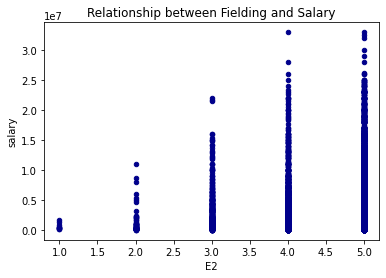

In [41]:
dfmerg_fld.plot.scatter(x='E2', y='salary', c='DarkBlue')
plt.title('Relationship between Fielding and Salary')
plt.show()

# This scatterplot shows that good fielding isn't enough to 
# guarantee high salary
# A bad rating at fielding, which would be around the range of 1 to 3, will 
# bring players less salary compared to players with high fielding rates 

In [42]:
csv_G = pd.read_csv("Batting.csv")
csv_G.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118.0,30.0,32.0,6.0,...,13.0,8.0,1.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137.0,28.0,40.0,4.0,...,19.0,3.0,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133.0,28.0,44.0,10.0,...,27.0,1.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120.0,29.0,39.0,11.0,...,16.0,6.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN


In [43]:
merged_data_G = csv_sal.merge(csv_G, on=["playerID", "yearID"])
merged_data_G

,yearID,teamID_x,lgID_x,playerID,salary,stint,teamID_y,lgID_y,G,AB,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,1985,ATL,NL,barkele01,870000,1,ATL,NL,20,17.0,...,0.0,0.0,1.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0
1,1985,ATL,NL,bedrost01,550000,1,ATL,NL,37,64.0,...,1.0,0.0,0.0,1.0,22.0,0.0,0.0,6.0,0.0,0.0
2,1985,ATL,NL,benedbr01,545000,1,ATL,NL,70,208.0,...,20.0,0.0,1.0,22.0,12.0,1.0,1.0,4.0,2.0,8.0
3,1985,ATL,NL,campri01,633333,1,ATL,NL,66,13.0,...,2.0,0.0,0.0,1.0,5.0,0.0,0.0,1.0,0.0,0.0
4,1985,ATL,NL,ceronri01,625000,1,ATL,NL,96,282.0,...,25.0,0.0,3.0,29.0,25.0,1.0,1.0,0.0,4.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27380,2015,WAS,NL,treinbl01,512800,1,WAS,NL,60,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0
27381,2015,WAS,NL,ugglada01,507500,1,WAS,NL,67,120.0,...,16.0,0.0,1.0,19.0,40.0,0.0,1.0,0.0,1.0,3.0
27382,2015,WAS,NL,werthja01,21000000,1,WAS,NL,88,331.0,...,42.0,0.0,1.0,38.0,84.0,0.0,3.0,0.0,6.0,8.0
27383,2015,WAS,NL,zimmejo02,16500000,1,WAS,NL,33,63.0,...,3.0,0.0,0.0,0.0,18.0,0.0,0.0,6.0,0.0,0.0


In [44]:
merged_data_G["E3"] = pd.cut(merged_data_G.G, bins=5, 
       labels=[5, 4, 3, 2, 1])

In [45]:
merged_data_G.head()

,yearID,teamID_x,lgID_x,playerID,salary,stint,teamID_y,lgID_y,G,AB,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,E3
0,1985,ATL,NL,barkele01,870000,1,ATL,NL,20,17.0,...,0.0,1.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,5
1,1985,ATL,NL,bedrost01,550000,1,ATL,NL,37,64.0,...,0.0,0.0,1.0,22.0,0.0,0.0,6.0,0.0,0.0,4
2,1985,ATL,NL,benedbr01,545000,1,ATL,NL,70,208.0,...,0.0,1.0,22.0,12.0,1.0,1.0,4.0,2.0,8.0,3
3,1985,ATL,NL,campri01,633333,1,ATL,NL,66,13.0,...,0.0,0.0,1.0,5.0,0.0,0.0,1.0,0.0,0.0,3
4,1985,ATL,NL,ceronri01,625000,1,ATL,NL,96,282.0,...,0.0,3.0,29.0,25.0,1.0,1.0,0.0,4.0,15.0,3


In [46]:
dfmerg_G = merged_data_G 

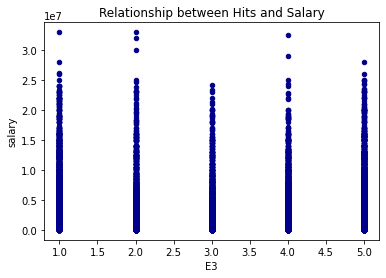

In [47]:
dfmerg_G.plot.scatter(x='E3', y='salary', c='DarkBlue')
plt.title('Relationship between Hits and Salary')
plt.show()

# This plot does not suggest any meaningful trends 